# 7. Typical scikit-learn workflow

# Introduction to scikit-learn(sklearn)
This notebook demonstrates some of the most useful functions of the beautiful
Scikit-Learn library.

What we're going to cover:
0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

## 0. And end-to-end Scikit-Learn workflow

In [3]:
# 1.Get the data ready
import pandas as pd
import numpy as np
heart_disease=pd.read_csv("11.3 heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create X (features matrix)
x=heart_disease.drop("target", axis=1)

#create y(labels)
y=heart_disease["target"]

In [5]:
# 2. Choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier 
clf=RandomForestClassifier()
#forestclassifier is a classification ml model.
# It is capable of learning patterns and data and then classifying wheather...
# sample is one thing or the another thing.

# We'll keep the defult hyperparameters
clf.get_params()
# we re using .get parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3.Fit the model to the training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

In [7]:
clf.fit(x_train, y_train);
# Our model is fit to the data

In [8]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2


In [9]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2


In [10]:
# Make a Prediction
y_label=clf.predict(np.array([0,2,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:
y_preds=clf.predict(x_test)
y_preds
 # Y preds is a conventional name for making predictions on test data

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [12]:
y_test

294    0
216    0
234    0
263    0
127    1
      ..
24     1
48     1
71     1
177    0
192    0
Name: target, Length: 61, dtype: int64

In [13]:
# 4.Evaluate the model on the training data and the test data
clf.score(x_train,y_train)

1.0

In [14]:
clf.score(x_test,y_test)

0.8032786885245902

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        23
           1       0.88      0.79      0.83        38

    accuracy                           0.80        61
   macro avg       0.79      0.81      0.80        61
weighted avg       0.81      0.80      0.81        61



In [16]:
confusion_matrix(y_test,y_preds)

array([[19,  4],
       [ 8, 30]], dtype=int64)

In [17]:
accuracy_score(y_test,y_preds)

0.8032786885245902

In [18]:
# 5. Improve a model
#Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators..")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set: {clf.score(x_test,y_test) *100:.2f}%")
    print("")

Trying model with 10 estimators..
Model accuracy on test set: 85.25%

Trying model with 20 estimators..
Model accuracy on test set: 81.97%

Trying model with 30 estimators..
Model accuracy on test set: 83.61%

Trying model with 40 estimators..
Model accuracy on test set: 80.33%

Trying model with 50 estimators..
Model accuracy on test set: 80.33%

Trying model with 60 estimators..
Model accuracy on test set: 81.97%

Trying model with 70 estimators..
Model accuracy on test set: 83.61%

Trying model with 80 estimators..
Model accuracy on test set: 83.61%

Trying model with 90 estimators..
Model accuracy on test set: 81.97%



In [19]:
# 6. Save a model and load it
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [20]:
loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(x_test, y_test)

0.819672131147541

# 9. Getting your data ready splitting


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Getting our data ready to be used with machine Learning
### Three main things we have to do:
    1.Split the data into features and labels (usually "x" and "y").
    2.Filling (also called imputing) or disregarding missing values.
    3.Converting non-numerical values to numerical values (also called
                                                          feature encoding).

In [22]:
heart_disease=pd.read_csv("11.3 heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [23]:
x=heart_disease.drop("target",axis=1)
y=heart_disease.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(0.2))

In [25]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

# 11. Getting your data ready convert data to numbers

## 1.1 Make sure its all numerical

In [26]:
car_sales=pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [27]:
len(car_sales)

1000

In [28]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [29]:
# Split the data
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

# Split into training and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(0.2))

In [30]:
# Build Machine Learnind model 
from sklearn.ensemble import RandomForestRegressor
# RandomForestRegressor is same as randomForestClassifier problem but this time it can 
# predict the number.
model= RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [31]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features= ["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                                one_hot,
                               categorical_features)],
                              remainder="passthrough")

transformed_x= transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [32]:
x


,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [33]:
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [34]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [35]:
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies
# We use this method to change string into integer above

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [36]:
# Lets refit the model
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,
                                              test_size=0.2)
model.fit(x_train,y_train);

In [37]:
model.score(x_test,y_test)

0.3235867221569877

# 12. Getting your data ready handling missing values

### 1.2 What if there were missing values ?
1. Fill them with some values (also known as imputation).
2. Remove the samples with missing data altogether.

In [38]:
# import car sales missing data
car_sales_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [39]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### Option 1: Fill missing data with Pandas


In [40]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing" ,inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)

#Fill the "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

#Fill the doors
car_sales_missing["Doors"].fillna(4, inplace=True)
# we replaced the doors with the average doors the car have

In [41]:
car_sales_missing.head(15)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.000000,4.0,15323.0
1,BMW,Blue,192714.000000,5.0,19943.0
2,Honda,White,84714.000000,4.0,28343.0
3,Toyota,White,154365.000000,4.0,13434.0
4,Nissan,Blue,181577.000000,3.0,14043.0
5,Honda,Red,42652.000000,4.0,23883.0
6,Toyota,Blue,163453.000000,4.0,8473.0
7,Honda,White,131253.237895,4.0,20306.0
8,missing,White,130538.000000,4.0,9374.0
9,Honda,Blue,51029.000000,4.0,26683.0


In [42]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [43]:
# Remove Rows with missing price values
car_sales_missing.dropna(inplace=True)

In [44]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [45]:
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [46]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features= ["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                                one_hot,
                               categorical_features)],
                              remainder="passthrough")

transformed_x= transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with ScikitLearn

# 14. Getting Your Data Ready Handling Missing Values

In [47]:
car_sales_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [48]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [49]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [50]:
# Split into X and Y
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [51]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' $ 'numerical' values with mean
cat_imputer=SimpleImputer(strategy="constant", fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")
                          
# define Columns
cat_features= ["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]
                          
# Create an imputer (Something that fills missing data)
imputer= ColumnTransformer([
    ("cat_imputer",cat_imputer, cat_features),
    ("door_imputer", door_imputer,door_features),
    ("num_imputer", num_imputer,num_features)
])
     
# Transform the data
filled_x=imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [52]:
car_sales_filled= pd.DataFrame(filled_x,
                              columns=["Make","Colours","Doors","Odometer (KM)"])

In [53]:
car_sales_filled

,Make,Colours,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [54]:
car_sales_filled.isna().sum()

Make             0
Colours          0
Doors            0
Odometer (KM)    0
dtype: int64

In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features= ["Make","Colours","Doors"]
one_hot=OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                                one_hot,
                               categorical_features)],
                              remainder="passthrough")

transformed_x= transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [56]:
# Now we've got our data as numbers and filled(no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,
                                              test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.21990196728583944

In [57]:
# The process of filling missing values is called imputation.
#The process of turning non-numerical data into numerical is feature encoding.

# 15.Choosing The Right Model For Your Data

## 2. Choosing the right estimator/algorithm for our problems
Scikit-Learn uses estimator as another term for machine learning model or algorithm.
* Classification- predicting whether a sample is one thing or another
* Regression- Predicting a number

* Go to the sklearn ml map

### 2.1 Picking a machine learning model for a regression problem

##### we'r going to use the scikit learning built in data set(i.e. boston dataset)

In [58]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston=load_boston()
boston;

In [59]:
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [60]:
len(boston_df)

506

In [61]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

#Setup random seed
np.random.seed(42) 

# create the data
x=boston_df.drop("target",axis=1)
y=boston_df["target"]

#Split into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#instantiate Ridge model
model=Ridge()
model.fit(x_train,y_train)

#Check the score of the Ridge model on test data
model.score(x_test,y_test)

0.6662221670168522

 how do we improve this score

 what if Ridge wasn't working

# 16. Choosing The Right Model For Your Data 2

In [62]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#Setup random seed
np.random.seed(42)

# Create the data
x=boston_df.drop("target",axis=1)
y=boston_df["target"]

# Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instatiate Random Forest Regressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

# Evaluate the Random Forest Regressor
model.score(x_test,y_test)

0.8654448653350507

 By using RandomForestReggressor we are able to improve our model than that by the Ridge model

# 18. Quick Tip How ML Algorithm Work

# 19. Choosing The Right Model For Your Data3

### 2.2 Choosing and estimator for a classification problem


In [63]:
heart_disease=pd.read_csv("11.3 heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Consulting the map and it says to try LinearSVC

In [64]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)

#Make the data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
 
#Instantiate LinearSVC
clf=LinearSVC()
clf.fit(x_train,y_train)

#Evaluate the LinearSVc
clf.score(x_test,y_test)

C:\Users\thapa\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [65]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Now well use ensemble RandomForest Model and try it again

In [66]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#Make the data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
 
#Instantiate LinearSVC
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

#Evaluate the Random Forest Classifier
clf.score(x_test,y_test)

0.8524590163934426

Tidbit:
    1. If you have structured data, used ensemble metods
    2. If you have unstructured data, use deep learning or transfer learning

# 20. Fitting A Model To The Data

## 3. Fit the model/algoritm on our data and use it to make our predictions

### 3.1 Fitting The Model To The Data
Different names for:
* x = features, features variables, data
* y = labels, targets, target variables

In [67]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#Make the data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
 
#Instantiate LinearSVC
clf=RandomForestClassifier()

#Fit the model to the data (training the ml model)
clf.fit(x_train,y_train)

#Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(x_test,y_test)

0.8524590163934426

In [68]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [69]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


# 21.Making Predictions With Our Model

### 3.2 Make predictions using a machine learning model
2 ways to make predictions:
1. predict()
2. predict_proba()

In [70]:
# Use a trained model to make predictions
clf.predict(np.array([1,5,8,33,90,34,23,56,34,89,12,2,45]))

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.  5.  8. 33. 90. 34. 23. 56. 34. 89. 12.  2. 45.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [71]:
# x_test is a test data and is only 20 of the given total data.
#x_train & x_train data are different.
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [72]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [73]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [74]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [75]:
# Compare predictions to truth labels to evaluate the model
y_preds=clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [76]:
clf.score(x_test,y_test)

0.8524590163934426

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

# 22. Predict() vs predict_proba()

Make predictions with predict_proba()

In [78]:
# Predict_proba() returns proobabilities of a classification label
clf.predict_proba(x_test[:10])
#It is saying that it has 0.89% of probability being 0.(1st row)
# It hs 0.51% probability of being 1.

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [79]:
# Let's predict on the same data
clf.predict(x_test[:10])

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [80]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

# 23. Making Predictions With Our Model(Regression)

predict() can also be used for regression models.

In [81]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create the data
x=boston_df.drop("target",axis=1)
y=boston_df["target"]

#Split into training and test sets
x_train,x_test,y_train ,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate and fit model
model=RandomForestRegressor().fit(x_train,y_train)

#Make predictions
y_preds=model.predict(x_test)

In [82]:
np.array(y_preds[:10])

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [83]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [84]:
# Compare the predictions to the truth
# This is the way to evaluate the regression model
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

2.136382352941176

The above data shows that in average each predictions is 2.12 times far from its actual predictions.

# 24.Evaluating A Machine Learning Model
Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator score method
2. The scoring parameter
3. Problem-specific metric functions

### 4.1 Evaluating the model with the score method

In [85]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestClassifier()

model.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
model.score(x_test,y_test)

0.8524590163934426

In [87]:

model.score(x_train,y_train)

1.0

Let's do the same but for Regression...

In [88]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create the data
x=boston_df.drop("target",axis=1)
y=boston_df["target"]

#Split into training and test sets
x_train,x_test,y_train ,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate and fit model
model=RandomForestRegressor().fit(x_train,y_train)

In [89]:
model.score(x_test,y_test) 

0.8654448653350507

Note: The meaning of score will be different for different models.To see what it returns type shift +tab

# 25. Evaluating A ML Model 2

### 4.2 Evaluating a model using the scoring parameter

In [90]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestClassifier().fit(x_train,y_train)

In [91]:
clf.score(x_test,y_test)

0.8524590163934426

In [92]:
cross_val_score(model,x,y)
# It will make 5 Fold splits by default.

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [93]:
cross_val_score(model,x,y,cv=10)
#It will divide data into 10 training sets and returns score on each training set

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [94]:
np.random.seed(42)

#single training and test splits score
clf_single_score=clf.score(x_test,y_test)

#Take the mean od 5-fold cross-validation score
clf_score_val_score=np.mean(cross_val_score(model,x,y))

#Compare the two
clf_single_score, clf_score_val_score

(0.8524590163934426, 0.8248087431693989)

##### Default scoring parameter of classifier = mean accuracy
clf.score()

In [95]:
# Scoring parameter set to None by default
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

# 26. Evaluating A Classification Model 1.

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Arear under ROC curve
3. Confusion matrix
4. Classification report

### Accuracy

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier()
cross_val_score=cross_val_score(clf,x,y,cv=5)

In [97]:
np.mean(cross_val_score)

0.8248087431693989

In [98]:
print(f"Heart Disease Classifier Cross-Validated Accuracy :{np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy :82.48%


This is the method to present the model Accuracy

# 27. Evaluating A Classification Model 2

**Area under the receiver operating characteristics curve (AUC/ROC)**
* Area under curve(AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive= model predict 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 whhen truth is 1

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [100]:
from sklearn.metrics import roc_curve

#Fit the classifier
clf.fit(x_train,y_train)

#Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10]
 

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

 0.58 is the models probability of predicting 0 and 0.49 is the modles probability of predicting one

In [101]:
y_probs[:, 1]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [102]:
y_probs_positive= y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [103]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

# Check the false  positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [104]:
tpr

array([0.     , 0.     , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.375  , 0.5    , 0.53125, 0.5625 , 0.59375, 0.59375, 0.625  ,
       0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625, 0.9375 ,
       0.9375 , 0.96875, 0.96875, 1.     , 1.     ])

# 28. Evaluating A classification Model 3

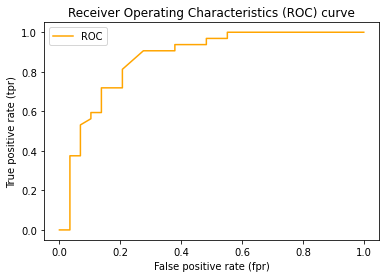

In [105]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate(tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr,tpr,color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    #plt.plot([0,1],[0,1], color="darkblue", linestyle="--",label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) curve")
    plt.legend()
    plt.show()
     
plot_roc_curve(fpr, tpr)

In [106]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

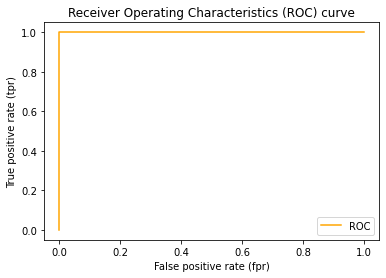

In [107]:
#plot perfect ROc curve and AUC score
fpr,tpr,threshold=roc_curve(y_test,y_test)
plot_roc_curve(fpr, tpr)

In [108]:
# Perfect AUc score
roc_auc_score(y_test,y_test)

1.0

# 29. Evaluating A classification model 4

**Confusion Matrix**

A confusion matrix is a quickly way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence giving you an idea of where the model is getting confused

In [109]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [110]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


* It is saying that, there are 23 cases where actual labels are 0 and prediction are also 0.

* 6 cases such that, actual labels are 0 but predicted 1

* 6 cases suct that actual labels are 1 but predicted 0

* 26 cases such that, actual levels are 1 and also predicted 1

In [111]:
23+6+6+26

61

In [112]:
len(x_test)

61

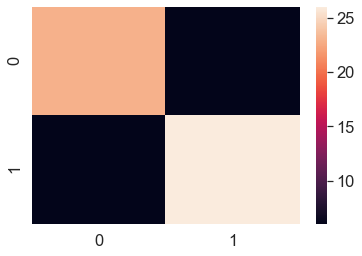

In [113]:
# Makke our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)

#plot it using Seaborn
sns.heatmap(conf_mat);

# 30. Evaluating A Classification Model 5

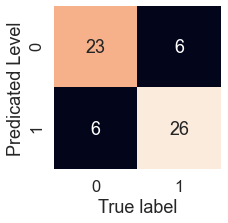

In [114]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,
                   annot=True, # Annotate the boxes with conf_mat info
                   cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicated Level");
plot_conf_mat(conf_mat)

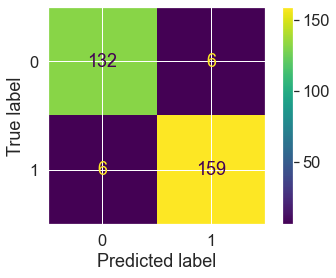

In [115]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,x,y);

# 31.Evaluating A Classification Model 6

**Classification Report**

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [117]:
# Where precision and recall becomes valuable
disease_true=np.zeros(10000)
disease_true[0]=1 #only one positive case
disease_preds=np.zeros(10000) #model predicts every case as 0
pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\thapa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


# 32. Evaluating A Regression Model 1

* **Accuracy** is a good measure to start with if all classes are balanced (eg.same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negative, aim for higher precision.
* If false negatie predictions are worse than false positive, aim for higher recall.
* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics


In regression we use three different models
1. R^2 (Pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets.values can range from negative infinity(a very poor model)to 1. For example,if all your model does is predict the mean of targets, it's R^2 value would be 0. And if your model perfectly predicts a range of nubers it's R^2 value would be 1.

In [118]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=boston_df.drop("target",axis=1)
y=boston_df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [119]:
model=RandomForestRegressor()
model.fit(x_train,y_train);

In [120]:
model.score(x_test,y_test)

0.8654448653350507

In [121]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean
y_test_mean=np.full(len(y_test),y_test.mean())

In [122]:
y_test.mean()

21.488235294117654

In [123]:
r2_score(y_test,y_test_mean)

2.220446049250313e-16

In [124]:
r2_score(y_test,y_test)

1.0

## 33. Evaluating A Regression Model 2

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.It gives you an idea of how wrong your models predictions are.

In [124]:
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test, y_preds)
mae

2.1226372549019623

In [125]:
df=pd.DataFrame(data={"actual values":y_test,
                     "predicted values":y_preds})
df["differences"]= df["predicted values"]-df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


# 34. Evaluating A Regression Model3 (MSE)

**Mean Squared error**

**MSE squares the differences and find the mean of the Squared differences**

In [126]:
from sklearn.metrics import mean_squared_error

y_preds=model.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse

9.242328990196082

In [127]:
# Calculate MSE by hand
squared=np.square(df["differences"]) #squares the differences
squared.mean() #Find mean of the squared number.

9.24232899019608

# 36.Evaluating A Model with Cross Validation and Scoring Parameter.

### 4.2.3 Finally using scoring parameter

In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier()
cv_acc=cross_val_score(clf,x,y,scoring=None) #By default scoring is none
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [129]:
# Cross validated accuracy
print(f"The cross-Validated accuracy is:{np.mean(cv_acc)*100:.2f}%")

The cross-Validated accuracy is:82.48%


In [130]:
np.random.seed(42)
cv_acc=cross_val_score(clf,x,y,scoring="accuracy")
print(f"The cross-Validated accuracy is:{np.mean(cv_acc)*100:.2f}%")

The cross-Validated accuracy is:82.48%


In [131]:
# precision
cv_precision=cross_val_score(clf,x,y,scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [132]:
# Recall
cv_recall=cross_val_score(clf,x,y,scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [133]:
cv_f1=cross_val_score(clf,x,y,scoring="f1")
np.mean(cv_f1)

0.841476533416832

**How about our regression model ?**

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=boston_df.drop("target",axis=1)
y=boston_df["target"]

model=RandomForestRegressor()

In [135]:
np.random.seed(42)
cv_r2=cross_val_score(model,x,y,scoring=None)
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [136]:
np.mean(cv_r2)

0.622375083951403

In [137]:
np.random.seed(42)
cv_r2=cross_val_score(model,x,y,scoring="r2")
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [138]:
#Mean absolute error
cv_mae=cross_val_score(model,x,y,scoring="neg_mean_absolute_error")
cv_mae


array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069])

In [139]:
#Mean squared error
cv_mse=cross_val_score(model,x,y,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.02253826604542

# 37. Evaluating A Model with Scikit-Learn Functions.

### 4.3 Using different evaluation metrics as Scikit-Learn functions
**Classification evaluation functions**

In [140]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

#Make some predictions
y_preds=clf.predict(x_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precisioin: {precision_score(y_test,y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1: {f1_score(y_test,y_preds)}")


Classifier metrics on the test set
Accuracy: 85.25%
Precisioin: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation model**

In [141]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x=boston_df.drop("target",axis=1)
y=boston_df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train,y_train)

#Make predictions using our regression model
y_preds=model.predict(x_test)

#Evaluate the regression model
print(f"Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")
      

Regression model metrics on the test set
R^2: 0.8739690141174031
MAE: 2.1226372549019623
MSE: 9.242328990196082


# 38.Evaluating A Machine Learning Model

## 5.Improving A Model

First predictions = baseline predictions.

First model = baseline model.

From a data prespective
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model prespective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters

* parameters = model find these patterns in data.
* Hyperparameters = setting on a model you can adjust to (potentially) improve its ability to find patterns.

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [142]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 39. Tuning Hyperparameters

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets,training, validation and test.
we're going to try and adjust
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [143]:
def evaluate_preds(y_true,y_preds):
    """
    performs evaluation comparison on y_true labels vs. y_preds labels
    on a classification.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"accuracy":round(accuracy, 2),
                 "precision":round(precision, 2),
                 "recall":round(recall,2),
                 "f1":round(f1, 2)}
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"precision: {precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [144]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42) 

#shuffle the data
heart_disease_shuffled= heart_disease.sample(frac=1)

#Split into x & y
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

#Split the data into train, validation and test sets
train_split= round(0.7 *len(heart_disease_shuffled)) #70% of the data
valid_split= round(train_split+ 0.15*len(heart_disease_shuffled)) # 15% of the data
x_train,y_train= x[:train_split],y[:train_split] #upto the train split
x_valid,y_valid= x[train_split:valid_split],y[train_split:valid_split] #train split to the valid split.
x_test,y_test= x[valid_split:],y[valid_split:] # from valid splid unwards to rest data

clf=RandomForestClassifier(n_estimators=10)
clf.fit(x_train,y_train);

# Make baseline predictions
y_preds= clf.predict(x_valid)

#Evaluate the classifier on validation set:
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc: 80.00%
precision: 0.77
Recall:0.92
F1 score: 0.84


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [145]:
len(x_train),len(x_valid),len(x_test)

(212, 45, 46)

In [146]:
np.random.seed(42)

#Create a second classifier with different hyperparameters
clf_2=RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train,y_train)

#Make predictions with different hyperparameters
y_preds_2= clf_2.predict(x_valid)

# Evaluate the 2nd classifier
clf_2_metrics=evaluate_preds(y_valid,y_preds_2)

Acc: 82.22%
precision: 0.84
Recall:0.84
F1 score: 0.84


In [147]:
np.random.seed(42)
clf_3=RandomForestClassifier(n_estimators=100,
                            max_depth=10)
clf_3.fit(x_train,y_train)

#Make predictions with different hyperparameters
y_preds_3 = clf_3.predict(x_valid)

# Evaluate the 2nd classifier
clf_3_metrics= evaluate_preds(y_valid,y_preds_3)

Acc: 80.00%
precision: 0.81
Recall:0.84
F1 score: 0.82


# 40. Tuning Hyperparameters 2

### 5.2 hyperparameter tuning with RandomizedsearchCV

In [148]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto","sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into x & y
x= heart_disease_shuffled.drop("target",axis=1)
y= heart_disease_shuffled["target"]

#Split into train and test sets
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs= 1)

# setup Ramdomized SearchCV
rs_clf= RandomizedSearchCV(estimator=clf, #we r passing clf ouur model to the estimator.
                          param_distributions=grid, #this will call the above grid we gave.
                          n_iter=10, # number of models to try
                          cv=5, # 5 fold cross-validation.
                          verbose=2)
#rs stands for randomized search

#Fit the RandomizedSearchCV versions of clf
rs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.7s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   32.1s finished


In [149]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [150]:
# Make predictions with the best hyperparameters
rs_y_preds= rs_clf.predict(x_test)

#Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc: 81.97%
precision: 0.77
Recall:0.86
F1 score: 0.81


# 41. Tuning Hyperparameters 3

### 5.3 Hyperparameter tuning with GridSearchCV

In [151]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

The key difference between Randomized searchCV and greedSearchCV is that
Randomized searchCV has the iter parameter to limit the number of models try.
But GridSearchCV is like Bruteforce. It will run the every possible combinations.

In [152]:
 grid_2 = {'n_estimators': [100, 200, 500],
            'max_depth': [None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_split': [6],
            'min_samples_leaf': [1, 2]}
# WE r reducing the number of hyperparameters depending upon the 
# best params we got in the RandomizedSearchCV.

In [153]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into x & y
x= heart_disease_shuffled.drop("target",axis=1)
y= heart_disease_shuffled["target"]

#Split into train and test sets
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs= 1)

# setup GridSearchCV
gs_clf= GridSearchCV(estimator=clf,
                          param_grid=grid_2,
                          cv=5,
                          verbose=2)

#Fit the GridSearchCV versions of clf
gs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   32.7s finished


In [154]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [155]:
gs_y_preds = gs_clf.predict(x_test)

#evaluuate the predictions
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Acc: 78.69%
precision: 0.74
Recall:0.82
F1 score: 0.78


Let's compare our different models metrics

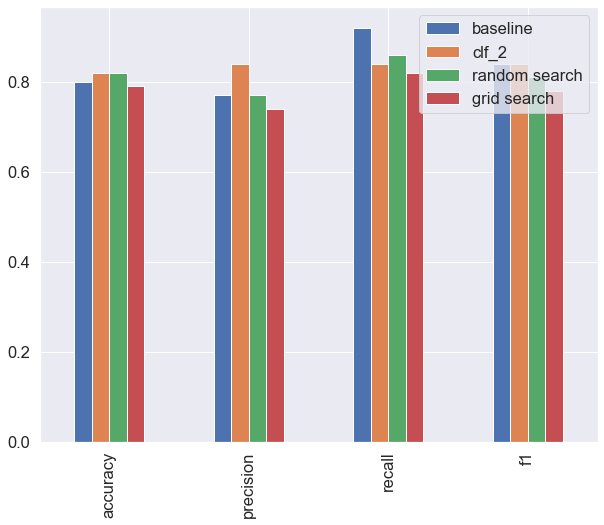

In [156]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                               "clf_2":clf_2_metrics,
                               "random search":rs_metrics,
                               "grid search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

# 43. Saving And Loading A Model 

## 6. Saving and loading trained machine learning models
Two ways to save and load machine learning models:
    1. with python's pickle module
    2. with the joblib module
    
**Pickle**

In [157]:
import pickle

# save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl","wb"))

In [158]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [159]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test,pickle_y_preds)

Acc: 78.69%
precision: 0.74
Recall:0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Loblib module**

In [160]:
from joblib import dump, load

#Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [161]:
# Import a saved joblib model
loaded_job_model = load(filename="gs_random_forest_model_1.joblib")

In [162]:
# Make and evaluate joblib predicttions
joblib_y_preds = loaded_job_model.predict(x_test)
evaluate_preds(y_test,joblib_y_preds)

Acc: 78.69%
precision: 0.74
Recall:0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

# 45. Putting It All Together

## 7. Putting it all together

In [165]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [166]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [167]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [199]:
# Getting the data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features= ["Make","Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# setup preprocessing steps(fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                                        ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                       ("model", RandomForestRegressor())])

#Split the data
x=data.drop("Price",axis=1)
y=data["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Fit and score the model
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.22188417408787875

# 46. Putting it All Together 2

 It is also possible to use GridSearchCV or RandomizedSearchCV with our pipeline.

In [215]:
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy" : ["mean","median"],
    "model__n_estimators": [100,1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_sample_split": [2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5,verbose=2)
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_sample_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter min_sample_split for estimator RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [216]:
gs_model.score(x_test,y_test)

AttributeError: 'GridSearchCV' object has no attribute 'scorer_'